### Transforms使用

In [1]:
from torchvision import transforms

#### 图片数据

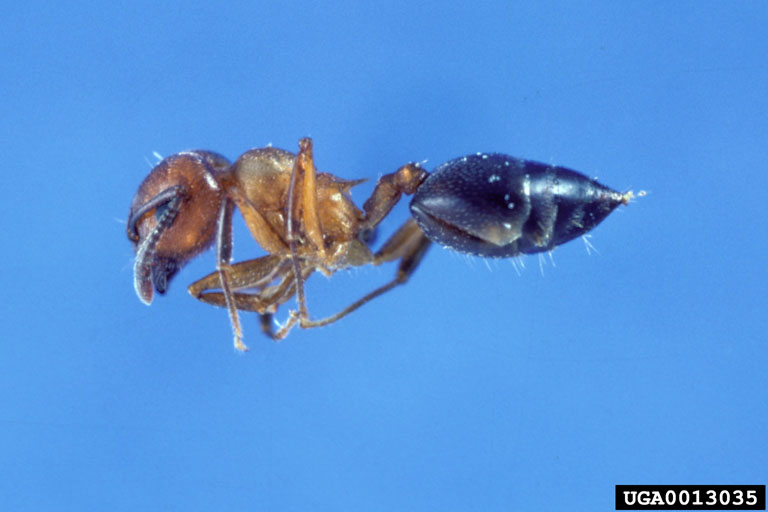

In [2]:
img_path = "../../../datas/hymenoptera_data/train/ants/0013035.jpg"
from PIL import Image

img = Image.open(img_path)
img

In [3]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

#### 实例化工具

In [4]:
to_tensor = transforms.ToTensor()
# 将图片类型转换为张亮类型
tensor_img = to_tensor(img)
tensor_img

tensor([[[0.3137, 0.3137, 0.3137,  ..., 0.3176, 0.3098, 0.2980],
         [0.3176, 0.3176, 0.3176,  ..., 0.3176, 0.3098, 0.2980],
         [0.3216, 0.3216, 0.3216,  ..., 0.3137, 0.3098, 0.3020],
         ...,
         [0.3412, 0.3412, 0.3373,  ..., 0.1725, 0.3725, 0.3529],
         [0.3412, 0.3412, 0.3373,  ..., 0.3294, 0.3529, 0.3294],
         [0.3412, 0.3412, 0.3373,  ..., 0.3098, 0.3059, 0.3294]],

        [[0.5922, 0.5922, 0.5922,  ..., 0.5961, 0.5882, 0.5765],
         [0.5961, 0.5961, 0.5961,  ..., 0.5961, 0.5882, 0.5765],
         [0.6000, 0.6000, 0.6000,  ..., 0.5922, 0.5882, 0.5804],
         ...,
         [0.6275, 0.6275, 0.6235,  ..., 0.3608, 0.6196, 0.6157],
         [0.6275, 0.6275, 0.6235,  ..., 0.5765, 0.6275, 0.5961],
         [0.6275, 0.6275, 0.6235,  ..., 0.6275, 0.6235, 0.6314]],

        [[0.9137, 0.9137, 0.9137,  ..., 0.9176, 0.9098, 0.8980],
         [0.9176, 0.9176, 0.9176,  ..., 0.9176, 0.9098, 0.8980],
         [0.9216, 0.9216, 0.9216,  ..., 0.9137, 0.9098, 0.

#### tensorboard中展示结果

In [5]:
from torch.utils.tensorboard import SummaryWriter

In [6]:
writer = SummaryWriter("./transform_logs")

In [7]:
writer.add_image("transfroms_demo",tensor_img,1)

**归一化处理图像**

In [8]:
print(tensor_img[0][0][0])

# (input-0.5)/0.5  result [-1,1]
to_norm = transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
norm_img = to_norm(tensor_img)

print(norm_img[0][0][0])

tensor(0.3137)
tensor(-0.3725)


tensorboard上查看结果

In [9]:
writer.add_image("transfroms_demo",norm_img,2)

**图片大小转换**

In [10]:
# 传入数据是PIL格式
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x512 at 0x1E5A30F8640>


In [11]:
img.size

(768, 512)

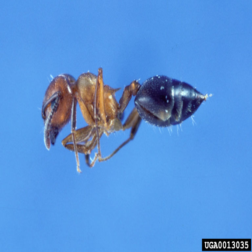

In [12]:
to_size = transforms.Resize((252,252))
resize_img = to_size(img)
resize_img

等比缩放

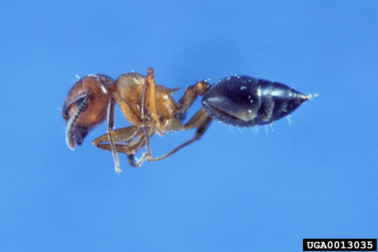

In [13]:
to2_size = transforms.Resize(252)
resize2_img = to2_size(img)
resize2_img

**关联方法**

In [14]:
# 1. 先缩放
# 2. 再转换为tensor格式
trans_compose = transforms.Compose([to2_size,to_tensor])
trans_img = trans_compose(img)
writer.add_image("transfroms_demo",trans_img,3)

**随机裁剪**

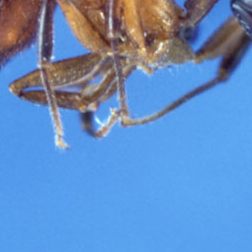

In [15]:
to_random = transforms.RandomCrop(252)
random_img = to_random(img)
random_img

In [16]:
writer.close()